In [35]:
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Load the data
train_in=[]
test_in=[]
train_out=[]
test_out=[]

with open('train_in - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        train_in.append(row)
train_in=np.array(train_in, dtype=float)


with open('train_out - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        train_out.append(row[0])
train_out=np.array(train_out, dtype=int) 

with open('test_in - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        test_in.append(row)
test_in=np.array(test_in, dtype=float)


with open('test_out - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        test_out.append(row[0])
test_out=np.array(test_out, dtype=int) 


In [36]:
alpha=0.01
epochs=20

#Initialize
W=np.zeros((257, 10))
W[-1, :]=1
T_train=np.hstack([train_in, np.ones((len(train_in), 1))])

#Train
for epoch in range(epochs):
    for i in range(len(train_in)):
        predict=np.argmax(np.dot(T_train[i], W))
        if predict != train_out[i]:
            W[:, train_out[i]] += alpha * T_train[i]
            W[:, predict] -= alpha * T_train[i]

#Predictions for the training set
train_predictions=np.zeros(len(train_in))
for i in range(len(train_in)):
    train_predictions[i]=np.argmax(np.dot(T_train[i], W))

con_ma_train=confusion_matrix(train_out, train_predictions)#confusion_matrix for training set
Overall_accuracy_train=np.trace(con_ma_train/len(train_in))#total accuracy for the training set
accuracy_train=con_ma_train.diagonal()/con_ma_train.sum(axis=1)#accuracy in each digits for the training set

Least_acc_train=np.where(accuracy_train==np.min(accuracy_train))#most difficult to classify correctly for training set

acc_ma_train=con_ma_train/con_ma_train.sum(axis=1)
error_matrix_train=np.triu(acc_ma_train, k=1)+np.tril(acc_ma_train, k=-1).T#Sum up the (i,j) and (j,i) elements in accuracy_train (trace not included)
error_ratio_train=np.max(error_matrix_train)
error_pair_train=np.where(error_matrix_train==error_ratio_train)

print(con_ma_train)
print(Overall_accuracy_train)#total accuracy for the training set
print(accuracy_train)#accuracy in each digits for the training set
print(Least_acc_train)#most difficult to classify correctly
print(error_pair_train)#most common mistaken pair for Nearest mean classifier in the training set

[[319   0   0   0   0   0   0   0   0   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  1   0 194   3   1   3   0   0   0   0]
 [  0   0   0 131   0   0   0   0   0   0]
 [  2   0   0   0 115   5   0   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0]
 [  2   0   0   0   0   3 146   0   0   0]
 [  0   0   0   0   1   0   0 165   0   0]
 [  2   1   0   3   0   9   0   0 129   0]
 [  0   0   0   0   0   2   0   1   0 129]]
0.9771528998242531
[1.         1.         0.96039604 1.         0.94262295 1.
 0.96688742 0.9939759  0.89583333 0.97727273]
(array([8]),)
(array([5]), array([8]))


In [37]:
#Predictions for the test set
T_test=np.hstack([test_in, np.ones((len(test_in), 1))])
test_predictions=np.zeros(len(test_in))
for i in range(len(test_in)):
    test_predictions[i]=np.argmax(np.dot(T_test[i], W))

con_ma_test=confusion_matrix(test_out, test_predictions)#confusion_matrix for test set
Overall_accuracy_test=np.trace(con_ma_test/len(test_in))
accuracy_test=con_ma_test.diagonal()/con_ma_test.sum(axis=1)

Least_acc_test=np.where(accuracy_test==np.min(accuracy_test))#most difficult to classify correctly for test set

acc_ma_test=con_ma_test/con_ma_test.sum(axis=1)
error_matrix_test=np.triu(acc_ma_train, k=1)+np.tril(acc_ma_train, k=-1).T#Sum up the (i,j) and (j,i) elements in accuracy_test (trace not included)
error_ratio_test=np.max(error_matrix_test)
error_pair_test=np.where(error_matrix_test==error_ratio_test)
print(con_ma_test)
print(Overall_accuracy_test)#total accuracy for the test set
print(accuracy_test)#accuracy in each digits for the test set
print(Least_acc_test)#most difficult to classify correctly
print(error_pair_test)#most common mistaken pair for Nearest mean classifier in the test set

[[216   0   0   3   3   0   0   0   1   1]
 [  0 116   0   0   1   0   3   1   0   0]
 [  3   0  80   4   2   4   0   2   6   0]
 [  2   0   2  65   0   4   0   2   4   0]
 [  6   2   2   2  62   4   0   2   1   5]
 [  4   0   0   5   0  44   0   0   1   1]
 [  2   0   2   0   1  11  74   0   0   0]
 [  0   0   1   1   3   0   0  57   0   2]
 [  3   0   1   5   1  10   0   2  67   3]
 [  0   2   1   1   0   2   0   7   1  74]]
0.8549999999999999
[0.96428571 0.95867769 0.79207921 0.82278481 0.72093023 0.8
 0.82222222 0.890625   0.72826087 0.84090909]
(array([4]),)
(array([5]), array([8]))


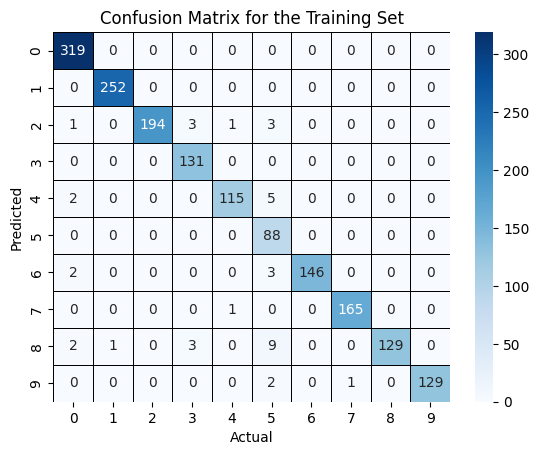

In [38]:
plt.figure()
sns.heatmap(con_ma_train, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), linewidths=0.5, linecolor='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for the Training Set')
plt.show()

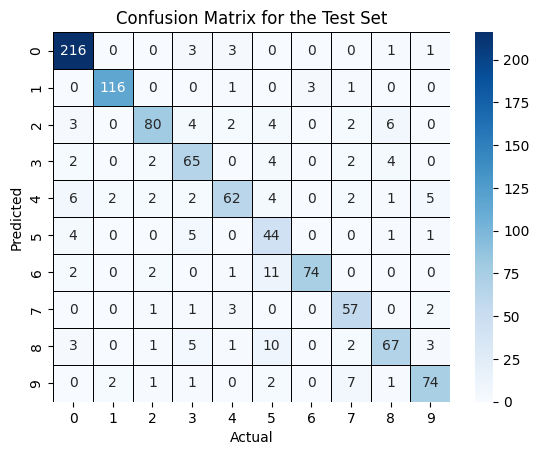

In [39]:
plt.figure()
sns.heatmap(con_ma_test, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), linewidths=0.5, linecolor='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for the Test Set')
plt.show()